In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import random
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [22]:
def data():
  df = pd.read_csv('insurance.csv')
  df.dropna(inplace = True)

  y=df.charges
  df = df.drop('charges', 1)
  df.sex=df.sex.map({'female': 1, 'male': 0})
  df.smoker=df.smoker.map({'yes': 1, 'no': 0})
  df.region=df.region.map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

  sns.heatmap(df[['age','sex', 'bmi', 'children','smoker','region']].corr(), cmap='Blues', annot=True)
  plt.show()

  x=df.to_numpy()
  y=y.to_numpy()
  x0=np.ones([x.shape[0], 1], dtype = 'float32') 
  x=np.concatenate((x0, x), axis = 1)
  #print(x.shape,y.shape)
  print('Data set after adding a bias:\n')
  print(x)
  return(x,y)

def model1(x,y):
  w=np.random.rand(x.shape[1],1)
  #print(w.shape)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  x_train=sklearn.preprocessing.scale(x_train)
  x_test=sklearn.preprocessing.scale(x_test)
  y_train=y_train.reshape(y_train.shape[0],1)
  y_test=y_test.reshape(y_test.shape[0],1)

  print('\nSplitting the data into training and testing')
  print('Input for training data shape:',x_train.shape,'Input for testing data shape',x_test.shape,
        'Output for training data shape:',y_train.shape,'Output for testing data shape:',y_test.shape)
  return(x_train, x_test, y_train, y_test,w)

def training(x_train,y_train):

  print('\nTraining the model:')
  model = LinearRegression().fit(x_train, y_train)
  r_sq = model.score(x_train, y_train)
  print('\ncoefficient of determination:', r_sq)
  print('Accuracy on training set:',r_sq*100,'%')
  print('\nintercept:', model.intercept_)
  print('\nslope:', model.coef_,'\n')
  

  y_pred_train = model.predict(x_train)
  e=mean_squared_error(y_train, y_pred_train)
  print('Mean squared error for train set:',e)
  c=plt.figure(1)      
  plt.plot(y_train)
  plt.plot(y_pred_train)
  plt.legend(['True','Predicted'],loc='best')
  plt.title('True VS predicted for train data')
  c.show()

  d=plt.figure(2)
  plt.scatter(y_train, y_pred_train)
  plt.xlabel('y_true')
  plt.ylabel('y_pred_train')
  plt.title('True VS predicted for train data')
  d.show()

  return(model)




In [27]:
def main():
  x,y=data()
  x_train, x_test, y_train, y_test,w=model1(x,y)
  model=training(x_train,y_train)
  y_pred_test = model.predict(x_test)
  e1=mean_squared_error(y_test, y_pred_test)
  print('Mean squared error for test set:',e1)
  a=plt.figure(3)      
  plt.plot(y_test)
  plt.plot(y_pred_test)
  plt.legend(['True','Predicted'],loc='best')
  plt.title('True VS predicted for test data')
  a.show()

  b=plt.figure(4)
  plt.scatter(y_test, y_pred_test)
  plt.xlabel('y_true')
  plt.ylabel('y_pred_test')
  plt.title('True VS predicted for test data')
  b.show()

  acc=model.score(x_test,y_test)
  print('Accuracy on testing set:',acc*100,'%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


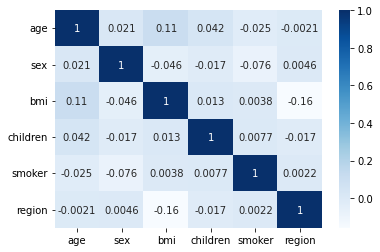

Data set after adding a bias:

[[ 1. 19.  1. ...  0.  1.  0.]
 [ 1. 18.  0. ...  1.  0.  1.]
 [ 1. 28.  0. ...  3.  0.  1.]
 ...
 [ 1. 18.  1. ...  0.  0.  1.]
 [ 1. 21.  1. ...  0.  0.  0.]
 [ 1. 61.  1. ...  0.  1.  2.]]

Splitting the data into training and testing
Input for training data shape: (1070, 7) Input for testing data shape (268, 7) Output for training data shape: (1070, 1) Output for testing data shape: (268, 1)

Training the model:

coefficient of determination: 0.7343421439219869
Accuracy on training set: 73.4342143921987 %

intercept: [13328.48263536]

slope: [[ 0.00000000e+00  3.53236144e+03 -4.70382815e+00  1.94486386e+03
   6.00177191e+02  9.46843240e+03  3.81958054e+02]] 

Mean squared error for train set: 38499812.19427541
Mean squared error for test set: 28802788.744449586
Accuracy on testing set: 81.16780101902357 %


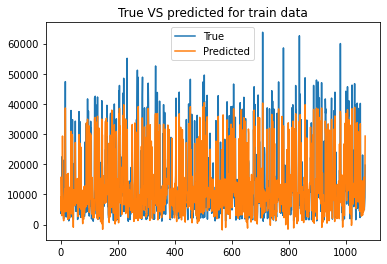

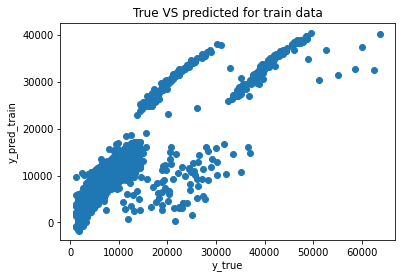

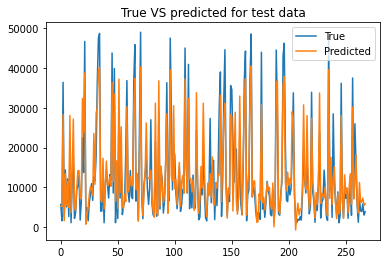

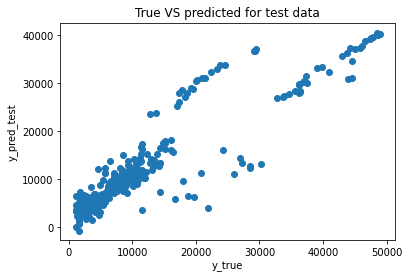

In [28]:
if __name__ == "__main__":
  main()